In [2]:
import sklearn

In [3]:
from sklearn.datasets import make_classification

In [4]:
X, y = make_classification(n_samples= 1000, n_features=10, n_informative=5, n_redundant=5, random_state=8)

In [5]:
X.shape

(1000, 10)

In [6]:
y.shape

(1000,)

## Regression dataset

In [19]:
from sklearn.datasets import make_regression
X1, y1 =  make_regression(n_samples= 1000, n_features=10, n_informative=5,random_state=8)

In [9]:
X1.shape

(1000, 10)

In [10]:
y1.shape

(1000,)

In [12]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

In [13]:
model = LinearRegression()

In [14]:
model.fit(X1, y1)

LinearRegression()

In [17]:
importance = model.coef_

In [18]:
for i,v in enumerate(importance):
    print('Target Feature: %0d, Score: %.5f' % (i, v))

Target Feature: 0, Score: -0.00000
Target Feature: 1, Score: 49.86029
Target Feature: 2, Score: 85.92732
Target Feature: 3, Score: 36.54476
Target Feature: 4, Score: 65.94189
Target Feature: 5, Score: 41.65577
Target Feature: 6, Score: 0.00000
Target Feature: 7, Score: -0.00000
Target Feature: 8, Score: -0.00000
Target Feature: 9, Score: -0.00000


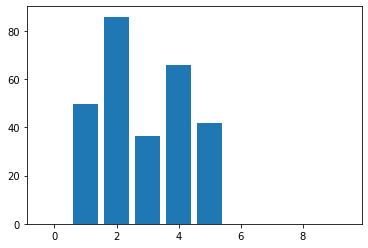

In [21]:
pyplot.bar([n for n in range(len(importance))], importance)
pyplot.show()

In [23]:
from sklearn.linear_model  import LogisticRegression
model2 = LogisticRegression()

In [24]:
X, y = make_classification(n_samples= 1000, n_features=10, n_informative=5, n_redundant=5, random_state=8)

In [25]:
model2.fit(X, y)

LogisticRegression()

In [29]:
importance2 = model2.coef_[0]

In [30]:
for i,v in enumerate(importance2):
    print('Target Feature: %0d, Score: %.5f' % (i, v))

Target Feature: 0, Score: -0.21145
Target Feature: 1, Score: -0.30395
Target Feature: 2, Score: 0.46059
Target Feature: 3, Score: -0.24448
Target Feature: 4, Score: -0.41246
Target Feature: 5, Score: -0.62990
Target Feature: 6, Score: -0.90989
Target Feature: 7, Score: -0.35987
Target Feature: 8, Score: 0.51248
Target Feature: 9, Score: -0.37018


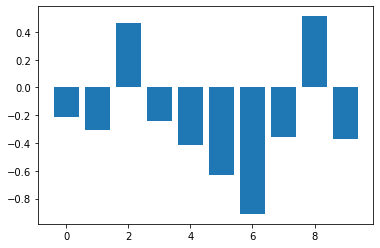

In [31]:
pyplot.bar([n for n in range(len(importance2))], importance2)
pyplot.show()

## Random forests

In [35]:
from sklearn import datasets
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
iris = sns.load_dataset('iris')

In [36]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [39]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
X_iris = iris.drop('species', axis=1) # pandas
y_iris = iris['species']

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(Xtrain, ytrain)

RandomForestClassifier()

In [43]:
y_pred = clf.predict(Xtest)

In [44]:
from sklearn import metrics

In [46]:
metrics.accuracy_score(ytest, y_pred)

0.9736842105263158

In [47]:
clf.predict([[3,5,4,2]])

array(['versicolor'], dtype=object)

In [58]:
feature_imp = pd.Series(clf.feature_importances_, index=iris.columns[:4]).sort_values(ascending=False)

In [59]:
feature_imp

petal_length    0.437177
petal_width     0.417395
sepal_length    0.103410
sepal_width     0.042017
dtype: float64

No handles with labels found to put in legend.


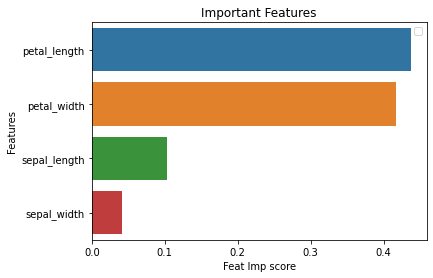

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feat Imp score')
plt.ylabel('Features')
plt.title('Important Features')
plt.legend()
plt.show()

## New model with selected features

In [63]:
from sklearn.model_selection import train_test_split

In [92]:
X = iris[['petal_length', 'petal_width', 'sepal_width']]

In [93]:
y = iris['species']

In [141]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.80, random_state=8) 

In [142]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)

In [143]:
metrics.accuracy_score(ytest, y_pred)

0.9583333333333334

In [98]:
ytrain.shape

(30,)

In [99]:
ytrain.shape

(30,)

In [100]:
iris.shape

(150, 5)

(30, 3)